In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from collections import Counter
#import tqdm
ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

Welcome to JupyROOT 6.28/00


In [12]:
date = "JUN29"
meson = "D"
chainSGN = ROOT.TChain("events")

if meson == "D":
    #chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1041_GFcat_D0StarCat_2018_old.root".format(date))
    chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1041_GFcat_D0StarCat_2018.root".format(date))
    df = ROOT.RDataFrame(chainSGN)
    df = df.Define("scale", "w*lumiIntegrated")\
        .Define("goodMeson_ditrk_pt_GEN", "get2BodyPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, -321, 211, 421, 423, 25)[0]")\
        .Define("goodMeson_ditrk_mass_GEN", "get2BodyPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, -321, 211, 421, 423, 25)[3]")\
        .Filter("goodMeson_ditrk_pt_GEN > 0")\
        .Define("Diff_ditrk_pt", "(goodMeson_ditrk_pt[0] - goodMeson_ditrk_pt_GEN)/goodMeson_ditrk_pt_GEN")\
        .Define("Diff_ditrk_mass", "(goodMeson_ditrk_mass[0] - goodMeson_ditrk_mass_GEN)")
    massxlow, massxhigh = 1.6, 2.1
elif meson == "P":
    #chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1039_GFcat_Phi3Cat_2018_old.root".format(date))
    chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1039_GFcat_Phi3Cat_2018.root".format(date))
    df = ROOT.RDataFrame(chainSGN)
    df = df.Define("scale", "w*lumiIntegrated")\
        .Define("goodMeson_ditrk_pt_GEN", "get2BodyPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, -211, 211, 333, 25)[0]")\
        .Define("goodMeson_ditrk_mass_GEN", "get2BodyPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, -211, 211, 333, 25)[3]")\
        .Filter("goodMeson_ditrk_pt_GEN > 0")\
        .Define("Diff_ditrk_pt", "(goodMeson_ditrk_pt[0] - goodMeson_ditrk_pt_GEN)/goodMeson_ditrk_pt_GEN")\
        .Define("Diff_ditrk_mass", "(goodMeson_ditrk_mass[0] - goodMeson_ditrk_mass_GEN)")
    massxlow, massxhigh = 0.2, 1


In [13]:
def getRSME(reco, gen):
    err = ((reco-gen)/gen)
    #return np.sum(np.abs(err))/len(err)
    return np.sqrt(np.sum(err**2)/len(err))

PT:  (48689,) (48689,) 0.03841779733027483
Mass:  (48689,) (48689,) 0.02704533199481694


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


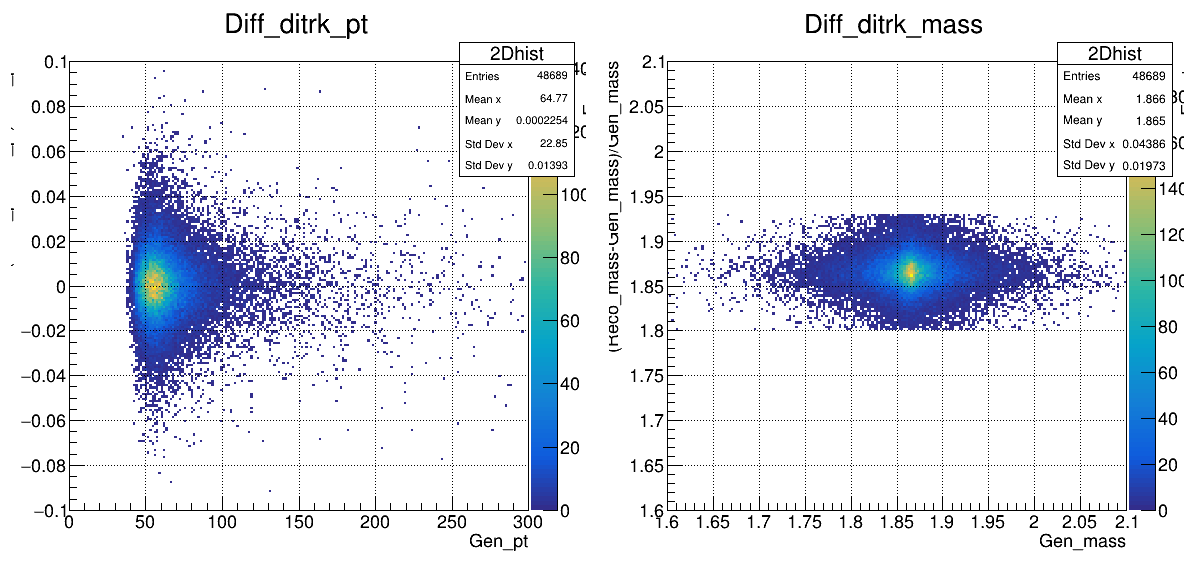

In [14]:
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 600)
canvas.Divide(2, 1)

nbins, xlow, xhigh, ylow, yhigh = 200, 0, 300, -0.1, 0.1
var, part = "pt", "ditrk"
h_pt = df.Histo2D(("2Dhist", "Diff_{}_{}".format(part, var), nbins, xlow, xhigh, nbins, ylow, yhigh), "goodMeson_{}_{}_GEN".format(part, var), "Diff_{}_{}".format(part, var))
h_pt.GetXaxis().SetTitle("Gen_{0}".format(var))
h_pt.GetYaxis().SetTitle("(Reco_{0}-Gen_{0})/Gen_{0}".format(var))
h_pt.GetZaxis().SetTitle("Events")
h_pt.SetContour(100)
p = canvas.cd(1)
p.SetGrid()
h_pt.Draw("colz")

nbins, xlow, xhigh, ylow, yhigh = 200, 0, 2.2, -0.2, 0.2
nbins, xlow, xhigh, ylow, yhigh = 200, 0.2, 1, 0.2, 1
var, part = "mass", "ditrk"
#h_mass = df.Histo2D(("2Dhist", "Diff_{}_{}".format(part, var), nbins, xlow, xhigh, nbins, ylow, yhigh), "goodMeson_{}_{}_GEN".format(part, var), "Diff_{}_{}".format(part, var))
h_mass = df.Histo2D(("2Dhist", "Diff_{}_{}".format(part, var), nbins, massxlow, massxhigh, nbins, massxlow, massxhigh), "goodMeson_{}_{}_GEN".format(part, var), "goodMeson_{}_{}".format(part, var))
h_mass.GetXaxis().SetTitle("Gen_{0}".format(var))
h_mass.GetYaxis().SetTitle("(Reco_{0}-Gen_{0})/Gen_{0}".format(var))
h_mass.GetZaxis().SetTitle("Events")
h_mass.SetContour(100)
p = canvas.cd(2)
p.SetGrid()
h_mass.Draw("colz")

canvas.Draw()

cols = ["goodMeson_ditrk_pt_GEN", "goodMeson_ditrk_pt", "goodMeson_ditrk_mass_GEN", "goodMeson_ditrk_mass"]
x = df.AsNumpy(columns=cols)
pddf = pd.DataFrame(x)

pt_gen = pddf["goodMeson_ditrk_pt_GEN"].to_numpy()
pt_reco = np.asarray([x[0] for x in pddf["goodMeson_ditrk_pt"]])
print("PT: ", pt_gen.shape, pt_reco.shape, getRSME(pt_reco, pt_gen))

mass_gen = pddf["goodMeson_ditrk_mass_GEN"].to_numpy()
mass_reco = np.asarray([x[0] for x in pddf["goodMeson_ditrk_mass"]])
print("Mass: ", mass_gen.shape, mass_reco.shape, getRSME(mass_reco, mass_gen))

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


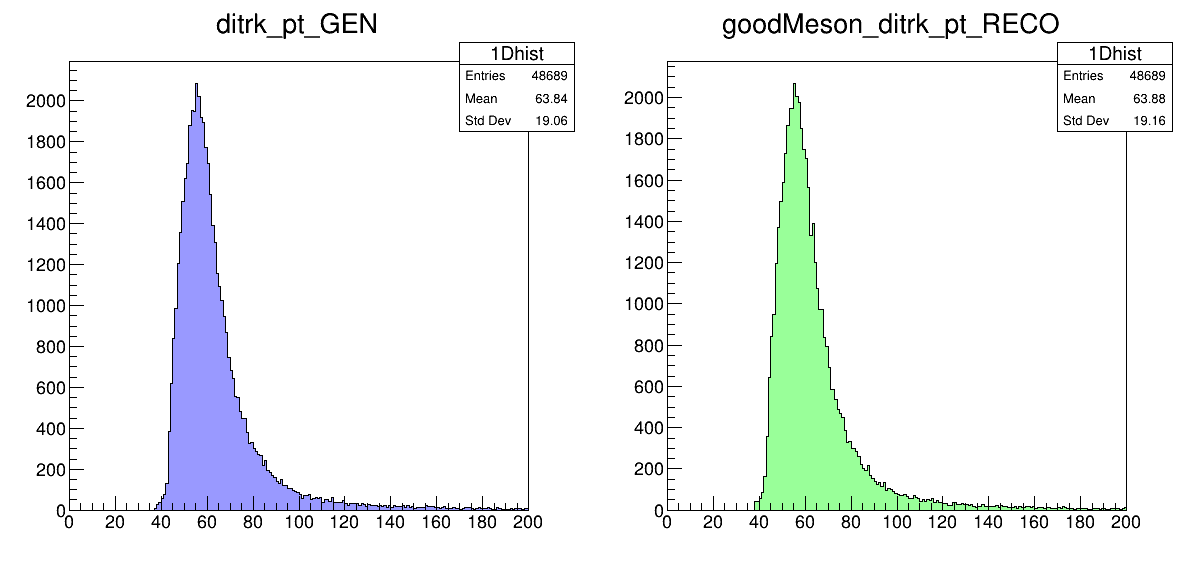

In [15]:
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 600)
canvas.Divide(2, 1)

nbins, xlow, xhigh, = 200, 0, 200
var, part = "pt", "ditrk"

h_pion = df.Histo1D(("1Dhist", "{}_{}_GEN".format(part, var), nbins, xlow, xhigh), "goodMeson_{}_{}_GEN".format(part, var))
hr = df.Histo1D(("1Dhist", "goodMeson_{}_{}_RECO".format(part, var), nbins, xlow, xhigh), "goodMeson_{}_{}".format(part, var))
#h = df.Histo2D(("2Dhist", "title", nbins, xlow, xhigh, nbins, ylow, yhigh), "{}_{}_GEN".format(part, var), "goodMeson_{}_{}_0".format(part, var))

canvas.SetRightMargin(0.15)
canvas.SetLeftMargin(0.13)
h_pion.SetFillColor(ROOT.kBlue-9)
hr.SetFillColor(ROOT.kGreen-9)
h_pion.SetLineColor(ROOT.kBlack)
hr.SetLineColor(ROOT.kBlack)
canvas.cd(1)
h_pion.Draw("hist")
canvas.cd(2)
hr.Draw("hist")

canvas.SetGrid()
canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


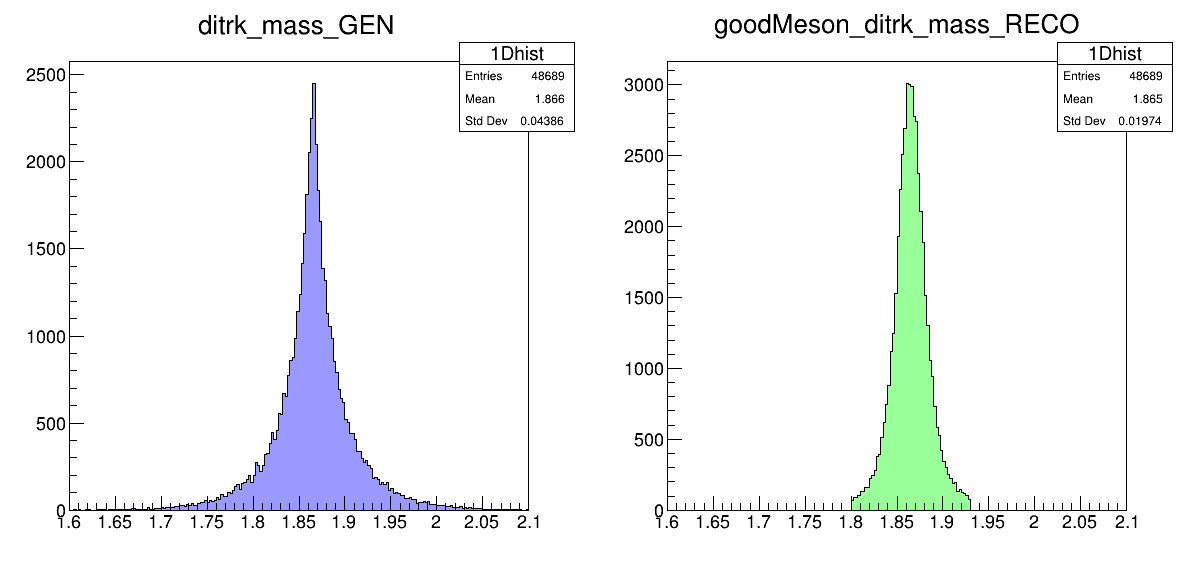

In [16]:
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 600)
canvas.Divide(2, 1)

nbins, xlow, xhigh, = 200, 0.2, 2.05
var, part = "mass", "ditrk"

h_pion = df.Histo1D(("1Dhist", "{}_{}_GEN".format(part, var), nbins, massxlow, massxhigh), "goodMeson_{}_{}_GEN".format(part, var))
hr = df.Histo1D(("1Dhist", "goodMeson_{}_{}_RECO".format(part, var), nbins, massxlow, massxhigh), "goodMeson_{}_{}".format(part, var))
#h = df.Histo2D(("2Dhist", "title", nbins, xlow, xhigh, nbins, ylow, yhigh), "{}_{}_GEN".format(part, var), "goodMeson_{}_{}_0".format(part, var))

canvas.SetRightMargin(0.15)
canvas.SetLeftMargin(0.13)
h_pion.SetFillColor(ROOT.kBlue-9)
hr.SetFillColor(ROOT.kGreen-9)
h_pion.SetLineColor(ROOT.kBlack)
hr.SetLineColor(ROOT.kBlack)
canvas.cd(1)
h_pion.Draw("hist")
canvas.cd(2)
hr.Draw("hist")

canvas.SetGrid()
canvas.Draw()